<a href="https://colab.research.google.com/github/nuraishasb/unsupervisedML/blob/main/R_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Unsupervised machine learning is where algorithms are used to analyze and structure data without predefined labels or outcomes. Unlike supervised learning, which relies on labeled training data to make predictions, unsupervised learning aims to uncover hidden patterns, relationships, and structures within the data.

### Principal Component Analysis

PCA is a method used to make data easier to understand and work with. It takes complex data and turns it into a smaller set of new variables called principal components. These new variables keep the most important information from the original data. By reducing the number of variables, PCA makes the dataset simpler but still useful.

The following data looks at a set of variables describing the economic characteristics of English parliamentary constituencies around 2017-2019.

In [7]:
df <- read.csv(url("https://raw.githubusercontent.com/lse-me314/lse-me314.github.io/master/data/const-econ-vars.csv"))
head(df)

,ONSConstID,ConstituencyName,HouseWageRatio,UnempConstRate,UnempConstRateChange,WageMedianConst,social_mobility_score,deprivation_index_score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,E14000530,Aldershot,9.778357,0.01601645,-0.014241906,590,-24.94625,14.264920
2,E14000531,Aldridge-Brownhills,6.866415,0.03081285,-0.021427075,560,12.11135,17.265634
3,E14000532,Altrincham and Sale West,8.154820,0.02031075,-0.006724744,790,103.84612,9.642267
4,E14000533,Amber Valley,5.593565,0.03287494,-0.017034626,520,-37.11118,20.806737
5,E14000534,Arundel and South Downs,12.608764,0.01363878,-0.005952356,610,-54.87172,10.522037
6,E14000535,Ashfield,5.184766,0.03827855,-0.015818210,510,-30.71503,25.756452


In [8]:
#assessing correlations
round(cor(df[,3:8], use = "pairwise.complete.obs"),2)

,HouseWageRatio,UnempConstRate,UnempConstRateChange,WageMedianConst,social_mobility_score,deprivation_index_score
HouseWageRatio,1.00,-0.40,-0.04,0.68,0.56,-0.33
UnempConstRate,-0.40,1.00,-0.17,-0.52,-0.26,0.90
UnempConstRateChange,-0.04,-0.17,1.00,0.04,0.03,-0.39
WageMedianConst,0.68,-0.52,0.04,1.00,0.66,-0.55
social_mobility_score,0.56,-0.26,0.03,0.66,1.00,-0.30
deprivation_index_score,-0.33,0.90,-0.39,-0.55,-0.30,1.00


The unemployment rate and the deprivation index is highly correlated, indicating that higher unemployment rates are strongly associated with higher deprivation index scores.

Change in unemployment rate has a weak correlation with majority of the other variables. This may be because places that are economically poor or affluent tend to remain so over time hence the changes in unemployment rates do not align with the current economic conditions of these places. There is no strong relationship between how unemployment rates have changed and whether a place is currently poor or affluent. Essentially, the stability in economic status overshadows any potential impact that changes in unemployment rates might have had.

In [9]:
#calculating principal components
pca <- prcomp(df[,3:8], scale. = TRUE)
pca
summary(pca)

Standard deviations (1, .., p=6):
[1] 1.7666732 1.1652675 0.8889118 0.6460604 0.5037648 0.2442953

Rotation (n x k) = (6 x 6):
                               PC1        PC2        PC3         PC4
HouseWageRatio          -0.4159756 -0.3771834 0.05947919  0.75825898
UnempConstRate           0.4548338 -0.3205344 0.47247017  0.03825962
UnempConstRateChange    -0.1302040  0.6051598 0.73740722  0.20929981
WageMedianConst         -0.4881757 -0.2380995 0.06771818 -0.04389976
social_mobility_score   -0.3867713 -0.3868244 0.42061614 -0.59345975
deprivation_index_score  0.4639288 -0.4271388 0.21900014  0.16016068
                                PC5         PC6
HouseWageRatio          -0.30144653  0.12382456
UnempConstRate           0.22721115  0.64348050
UnempConstRateChange     0.02493771 -0.16920649
WageMedianConst          0.82807063 -0.11304521
social_mobility_score   -0.41158724 -0.04752232
deprivation_index_score  0.04216830 -0.72590075

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6
Standard deviation     1.7667 1.1653 0.8889 0.64606 0.5038 0.24430
Proportion of Variance 0.5202 0.2263 0.1317 0.06957 0.0423 0.00995
Cumulative Proportion  0.5202 0.7465 0.8782 0.94776 0.9900 1.00000

Each Principal Component represents a different direction in the data space that maximizes variance. The first Principal Component captures the most variance, the second captures the next highest amount of variance orthogonal to the first, and so on. The Principal Components are uncorrelated with each other, meaning they are independent directions in which the data varies.

The first principal component explains approximately 52% of the variance in the underlying data.

Change in unemployment rate has the lowest loading in PC1. This is expected because this variable's low correlations with other variables mean it does not contribute significantly to the variance captured by PC1. Principal Components are designed to capture broad patterns in the data, so variables that do not show strong relationships with other variables will have minimal impact on the components that reflect the most significant patterns of variance.



In [13]:
#print loadings for first principal component
pca$rotation[,1]

HouseWageRatio          UnempConstRate    UnempConstRateChange 
             -0.4159756               0.4548338              -0.1302040 
        WageMedianConst   social_mobility_score deprivation_index_score 
             -0.4881757              -0.3867713               0.4639288

Loadings represent the correlation between each original variable and the Principal Component. A positive loading indicates a positive relationship with the PC, while a negative loading indicates a negative relationship.

PC1 has positive loadings for UnempConstRate and deprivation_index_score and negative loadings for HouseWageRatio, WageMedianConst, and social_mobility_score. This suggests that PC1 captures a gradient from less economically successful (or deprived) to more economically successful (or affluent) areas. Thus areas with positive PC1 scores are less economically successful or more deprived, while areas with negative PC1 scores are more affluent or economically successful.

In [14]:
#loadings for pc2
pca$rotation[,2]

HouseWageRatio          UnempConstRate    UnempConstRateChange 
             -0.3771834              -0.3205344               0.6051598 
        WageMedianConst   social_mobility_score deprivation_index_score 
             -0.2380995              -0.3868244              -0.4271388

PC2 is positively associated with unemployment rate changes and negatively associated with everything else.  It would appear this is heavily a factor for capturing unemployment rate changes, which we have already seen are mostly uncorrelated with the over variables.  

In [15]:
#removing uneployment rate changes
pca2 <- prcomp(df[,c(3,4,6,7,8)], scale. = TRUE)
pca2
summary(pca2)

Standard deviations (1, .., p=5):
[1] 1.7565429 1.0658834 0.6638214 0.5041835 0.2891193

Rotation (n x k) = (5 x 5):
                               PC1        PC2         PC3         PC4
HouseWageRatio          -0.4294957 -0.3798653 -0.73628018 -0.31772277
UnempConstRate           0.4531833 -0.5254131  0.07272015  0.20909319
WageMedianConst         -0.4979047 -0.2271984  0.02627548  0.83039862
social_mobility_score   -0.3964105 -0.5029322  0.64941606 -0.40424205
deprivation_index_score  0.4528885 -0.5244840 -0.17369989  0.04856716
                                PC5
HouseWageRatio          -0.16786763
UnempConstRate          -0.68524285
WageMedianConst          0.10109171
social_mobility_score    0.06902949
deprivation_index_score  0.69805307

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7565 1.0659 0.66382 0.50418 0.28912
Proportion of Variance 0.6171 0.2272 0.08813 0.05084 0.01672
Cumulative Proportion  0.6171 0.8443 0.93244 0.98328 1.00000

No significant changes to PC1 loadings after removing `UnempConstRateChange`.

In [29]:
cor(pca$x[,1],pca2$x[,1])

[1] 0.9969929

The first principal component values for the constituencies are very nearly identical as well, correlated at over 0.99.  Very little has changed because the variable we omitted was very weakly correlated with the others.  

### K-means Clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping subsets (clusters). The main objective of the algorithm is to minimize the variance within each cluster.

In [18]:
data("USArrests", package = "datasets")

In [22]:
#performing k-means where k=3
km_out <- kmeans(USArrests, 3, nstart = 20) #nstart will fit the algorithm 20 times from different start values, and select the best fitting one
km_out

K-means clustering with 3 clusters of sizes 20, 14, 16

Cluster means:
     Murder  Assault UrbanPop     Rape
1  4.270000  87.5500 59.75000 14.39000
2  8.214286 173.2857 70.64286 22.84286
3 11.812500 272.5625 68.31250 28.37500

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              3              3              2              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              3              3              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              3              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              3              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3              1              3          

From the cluster means output, cluster 1 has an average Murder rate of 4.27, Assault rate of 87.55, UrbanPop of 59.75, and Rape rate of 14.39. States in this cluster generally have lower rates of violent crime and a moderate urban population. These could be states with relatively safer environments compared to others in the dataset. States in cluster 2 have moderate to high levels of violent crime and a higher urban population. These states may be more urbanized with higher crime rates. States in cluster 3 have the highest rates of violent crime among the clusters and a moderately high urban population. These states are likely to be the most urbanized and have significant crime issues.

The clustering vector indicates which cluster each data point (state) belongs to.

Within cluster sum of squares by cluster provides the sum of squared distances from each point to its respective cluster centroid, for each cluster. Lower values indicate tighter clusters.
The percentage (86.5%) shows the proportion of the total variance that is explained by the clustering. Higher values indicate that the clusters explain a large portion of the variance in the data.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘usmapdata’




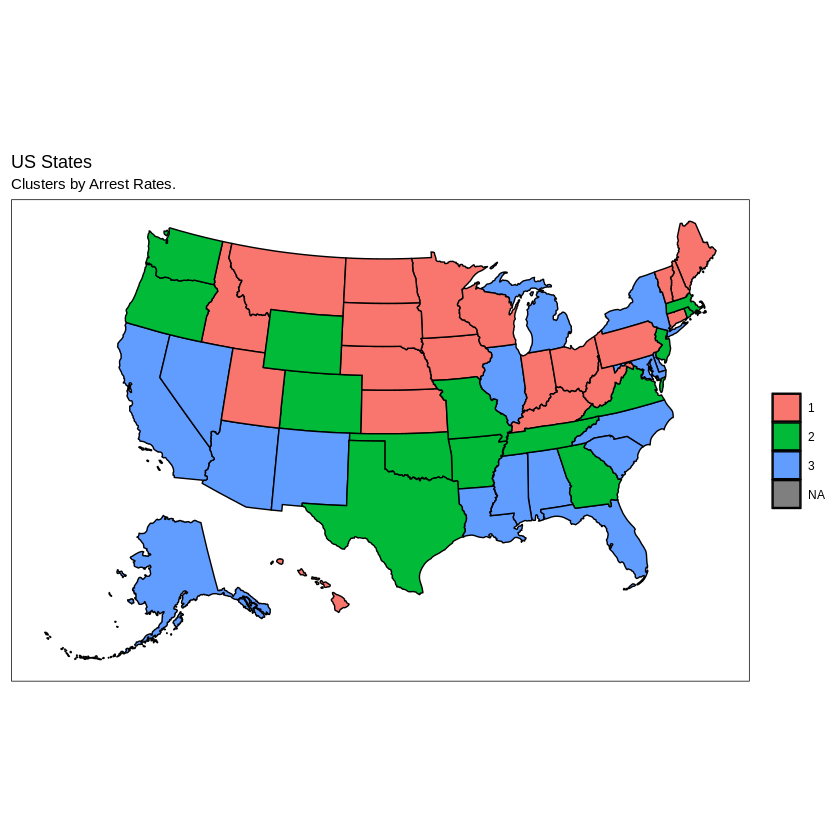

In [24]:
library(ggplot2)
install.packages("usmap")
library(usmap)

cluster <- km_out$cluster

classification_df <- data.frame(state=tolower(names(cluster)),
                                cluster=as.factor(as.numeric(cluster)))

#create a map of the clusters of US states
state_plot <- plot_usmap(regions="states", data=classification_df, values="cluster") +
  labs(title="US States",subtitle="Clusters by Arrest Rates.") +
  scale_colour_hue() +
  theme( panel.background = element_rect(color = "black", fill = "white"), legend.position="right") +
  guides(fill=guide_legend(title=""))

state_plot

### Hierarchical Clustering

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data.

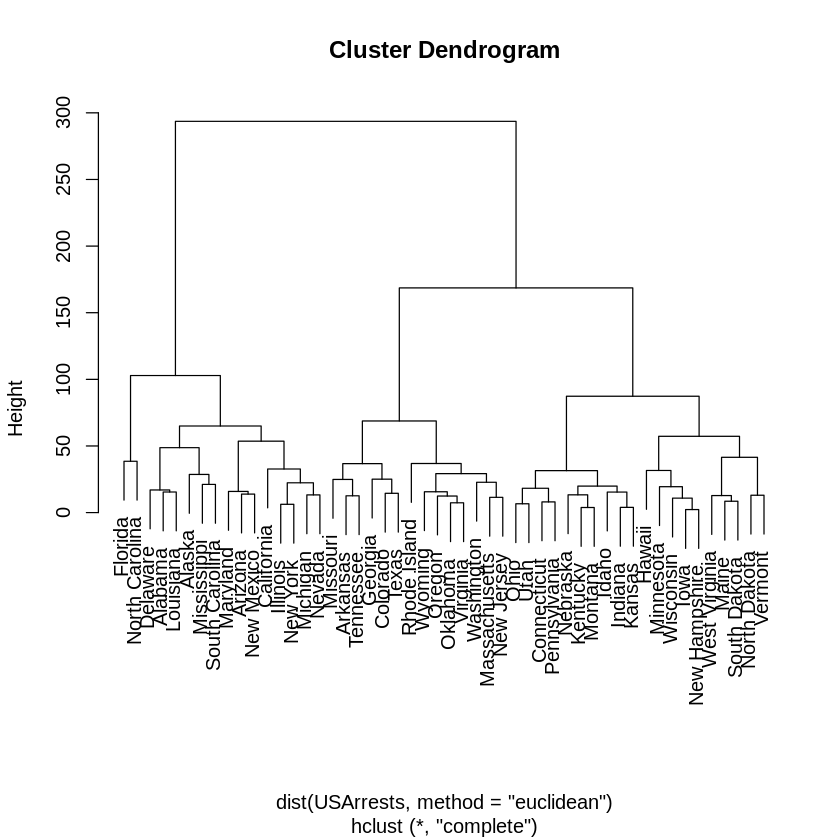

In [25]:
#perform hierarchical clustering
hc <- hclust(dist(USArrests, method = "euclidean"), method = "complete")
plot(hc)

The dendrogram shows the hierarchical relationship between states based on their arrest data, using complete linkage and Euclidean distance.

States that are close to each other (in terms of Euclidean distance) are merged first. For example, Florida and North Carolina are merged into one cluster at a low height, indicating they are very similar according to the dataset.

In [26]:
#cutting at 3 clusters
cutree(hc, 3)
table(cutree(hc, 3))

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2


 1  2  3 
16 14 20 

how does the kmeans cluster differ from hc?
are the same countries clustered together using the same approach?

In [27]:
#comparing K-means clusters & hierarchical clusters
USArrests$clusters_k <- km_out$cluster
USArrests$clusters_h <- cutree(hc, 3)

table(USArrests$clusters_k, USArrests$clusters_h)

   
     1  2  3
  1  0  0 20
  2  0 14  0
  3 16  0  0

The clusters contain the same states regardless of the approach used.

   
     1  2  3
  1 15  1  0
  2  0 14  0
  3  0  0 20


 1  2  3 
16 14 20 

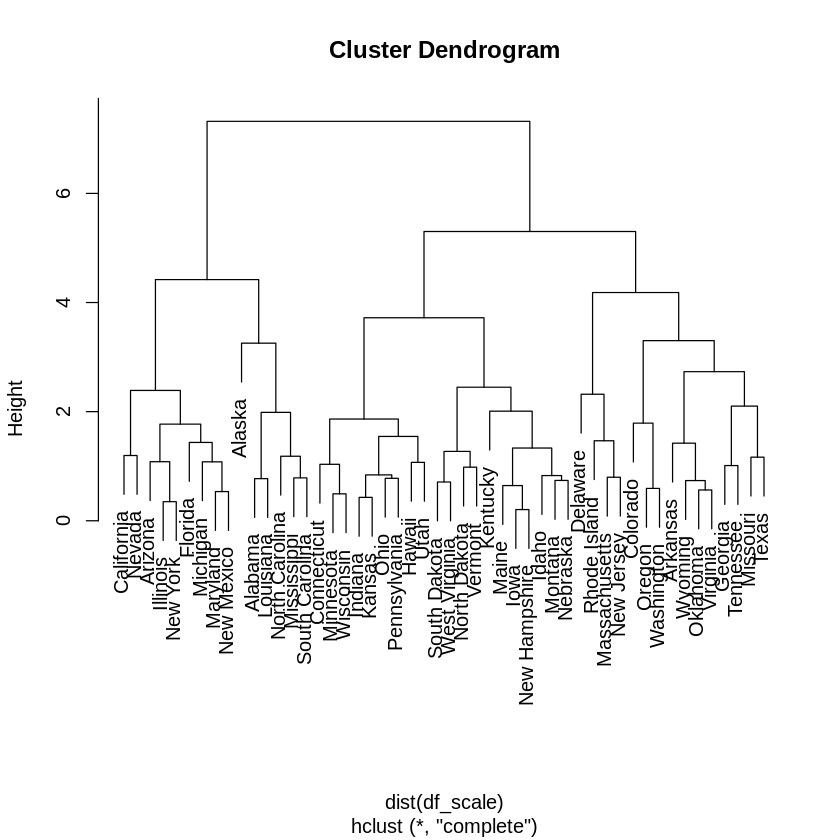

In [30]:
#scaling variables first, before performing HS
df_scale <-  scale(USArrests)
hc_scale <-  hclust(dist(df_scale), method = "complete")
plot(hc_scale)
USArrests$clusters_hs <- cutree(hc_scale, 3)
table(USArrests$clusters_h, USArrests$clusters_hs)
table(USArrests$clusters_h)

After scaling, each variable has equal influence, leading to a more balanced consideration of all features. Clusters also appear more evenly distributed.
